# Does the type of encoding matters for a decision tree and random forest provided the way they function.

In [1]:
# Determine the success of an ad campaign.
# The dataset we have contains a total of 12 columns and 26048 observations.
# So, based on these features and observations, we will predict if a particular ad will be successful in the future or not.
# We will visualize the data and try to understand the type of ad campaigns which are more successsful and focus on those kind 
# of ads in the future or try to understand why particular ads are more successful than others.
# With these kind of insights, we can also improve the unsuccessful ones.

In [51]:
#Import the libraries.

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


In [53]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'


In [55]:
#Import the data
train=pd.read_csv('C:\\Users\\anju\\Desktop\\Data science misc\\datasets for practice\\Ad success/Train.csv')

In [56]:
print('total train data: ' + str(train.shape))

total train data: (26048, 12)


In [7]:
#Data cleaning

In [8]:
train.isnull().sum()    # No missing values found.

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [9]:
for i in train.columns:
    print( i , ':', train[i].nunique())

id : 26048
realtionship_status : 7
industry : 6
genre : 5
targeted_sex : 2
average_runtime(minutes_per_week) : 91
airtime : 3
airlocation : 42
ratings : 125
expensive : 3
money_back_guarantee : 2
netgain : 2


In [57]:
#dropping id column as its of no use
train = train.drop(['id'],axis=1)
train.head()


,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


# Lets apply Label encoding at first to all the categorical columns.

In [17]:
train.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [22]:
#Using label encoder to convert the object data types into numeric data type

for col in ['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain']:
    if (train[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(train[col])
        train[col] = le.transform(train[col])
        print('Completed Label encoding on',col)


Completed Label encoding on realtionship_status
Completed Label encoding on industry
Completed Label encoding on genre
Completed Label encoding on targeted_sex
Completed Label encoding on airtime
Completed Label encoding on airlocation
Completed Label encoding on expensive
Completed Label encoding on money_back_guarantee


In [24]:
# Since my target variable 'netgain' is boolean , I will use label encoding for this as well.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['netgain'])
train['netgain'] = le.transform(train['netgain'])


In [25]:
train.shape

(26048, 11)

In [26]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,3,0,0,1,45,2,39,0.027465,0,0,0
1,2,4,0,1,45,2,39,0.027465,1,0,0
2,0,2,0,0,45,2,39,0.027465,0,1,0
3,5,5,3,0,40,2,39,0.027465,1,0,0
4,2,4,0,1,48,2,39,0.027465,0,0,1


In [27]:
# Splitting the independent and target variables.

train_ind = train.drop(['netgain'],axis=1)
target = train['netgain']


In [28]:
print( 'Train independent dataset shape:', train_ind.shape , 'and', 'Train target dataset shape:', target.shape)


Train independent dataset shape: (26048, 10) and Train target dataset shape: (26048,)


In [42]:
#Splitting the dataset to train and test.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_ind, target, test_size=0.30, random_state=42)

print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (18233, 10)
y train size:  (18233,)
X test size:  (7815, 10)
y test size:  (7815,)


# Decision tree on label encoded data.

In [72]:
#decision tree without hyper parameter tuning

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

The precision score of decision tree on TRAIN is :  78.26 %
The accuracy score of decision tree on TRAIN is :  86.46 %
The precision score of decision tree on TEST is :  57.92 %
The accuracy score of decision tree on TEST is :  79.42 %


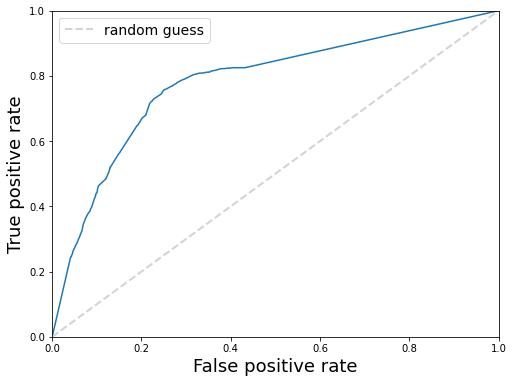

DT AUC is:  78.17 %


In [44]:
# Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, dtc.predict(x_train)
precision_score_DT_train = precision_score(x_actual, x_pred)
accuracy_score_DT_train = accuracy_score(x_actual, x_pred)
print('The precision score of decision tree on TRAIN is : ',round(precision_score_DT_train * 100,2), '%')
print('The accuracy score of decision tree on TRAIN is : ',round(accuracy_score_DT_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, dtc.predict(x_test)
precision_score_DT_test =  precision_score(y_actual, y_pred)
accuracy_score_DT_test = accuracy_score(y_actual, y_pred)
print('The precision score of decision tree on TEST is : ',round(precision_score_DT_test * 100,2), '%')
print('The accuracy score of decision tree on TEST is : ',round(accuracy_score_DT_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = dtc.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('DT AUC is: ', round(AUC_DT * 100,2), '%')


In [45]:
#decision tree with hyper parameter tuning.
# Decision tree classifier with grid seacrh CV and model evaluation using accuracy score, precision score and AUC/ROC curve.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7],'min_samples_leaf':[1,10,100],'random_state':[14]} 

clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                    

In [46]:
print('The best parameters are: ', clf.best_params_)
print('best mean cross-validated score (auc) : ', clf.best_score_)

The best parameters are:  {'max_depth': 7, 'max_features': 0.9, 'min_samples_leaf': 10, 'random_state': 14}
best mean cross-validated score (auc) :  0.8604281857142032


The precision score of tuned decision tree on TRAIN is :  66.54 %
The accuracy score of tuned decision tree on TRAIN is :  81.74 %
The precision score of tuned decision tree on TEST is :  64.6 %
The accuracy score of tuned decision tree on TEST is :  81.33 %


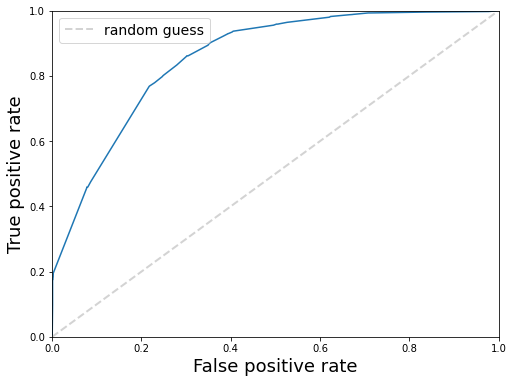

TNDT AUC is:  85.57 %


In [47]:
# Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf.predict(x_train)
precision_score_TNDT_train = precision_score(x_actual, x_pred)
accuracy_score_TNDT_train = accuracy_score(x_actual, x_pred)
print('The precision score of tuned decision tree on TRAIN is : ',round(precision_score_TNDT_train * 100,2), '%')
print('The accuracy score of tuned decision tree on TRAIN is : ',round(accuracy_score_TNDT_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf.predict(x_test)
precision_score_TNDT_test =  precision_score(y_actual, y_pred)
accuracy_score_TNDT_test = accuracy_score(y_actual, y_pred)
print('The precision score of tuned decision tree on TEST is : ',round(precision_score_TNDT_test * 100,2), '%')
print('The accuracy score of tuned decision tree on TEST is : ',round(accuracy_score_TNDT_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('TNDT AUC is: ', round(AUC_DT * 100,2), '%')


In [48]:
#random forest
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

clf1 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
print('The best parameters are: ', clf1.best_params_)
print('best mean cross-validated score (auc) : ', clf1.best_score_)

The best parameters are:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 14}
best mean cross-validated score (auc) :  0.8661046677150631


The precision score of random forest on TRAIN is :  70.1 %
The accuracy score of random forest on TRAIN is :  82.26 %
The precision score of random forest on TEST is :  67.44 %
The accuracy score of random forest on TEST is :  81.63 %


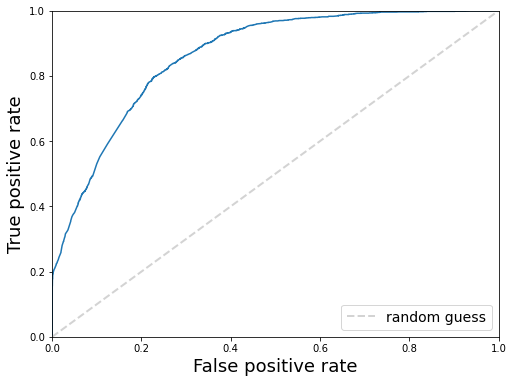

RF AUC is:  86.36 %


In [50]:
# Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf1.predict(x_train)
precision_score_RF_train = precision_score(x_actual, x_pred)
accuracy_score_RF_train = accuracy_score(x_actual, x_pred)
print('The precision score of random forest on TRAIN is : ',round(precision_score_RF_train * 100,2), '%')
print('The accuracy score of random forest on TRAIN is : ',round(accuracy_score_RF_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf1.predict(x_test)
precision_score_RF_test =  precision_score(y_actual, y_pred)
accuracy_score_RF_test = accuracy_score(y_actual, y_pred)
print('The precision score of random forest on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score of random forest on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf1.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')


# Lets apply one hot encoding now to all the categorical columns.

In [58]:
# My dataset has 8 categorical columns which we need to encode. Here I am using one hot encoding.

train_encode = pd.get_dummies(train)

In [59]:
train_encode.shape

(26048, 73)

In [ ]:
# converting target variable 'netgain'  with boolean data type to 0 and 1.

In [67]:
train_encode['netgain'] = train_encode['netgain'].replace({True: 1, False: 0})

In [68]:
train_encode.head()

,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,...,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,45,0.027465,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,45,0.027465,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,45,0.027465,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,40,0.027465,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,48,0.027465,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [69]:
# Splitting the independent and target variables.

train_ind_onehot = train_encode.drop(['netgain'],axis=1)
target_onehot = train_encode['netgain']

In [70]:
print( 'Train independent dataset shape:', train_ind_onehot.shape , 'and', 'Train target dataset shape:', target_onehot.shape)

Train independent dataset shape: (26048, 72) and Train target dataset shape: (26048,)


In [71]:
#Splitting the dataset to train and test.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_ind_onehot, target_onehot, test_size=0.30, random_state=42)

print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (18233, 72)
y train size:  (18233,)
X test size:  (7815, 72)
y test size:  (7815,)


# decision tree  on one hot encoded data

The precision score of decision tree on one hot encoded TRAIN is :  78.26 %
The accuracy score of decision tree on one hot encoded TRAIN is :  86.46 %
The precision score of decision tree on one hot encoded TEST is :  58.84 %
The accuracy score of decision tree on one hot encoded TEST is :  79.74 %


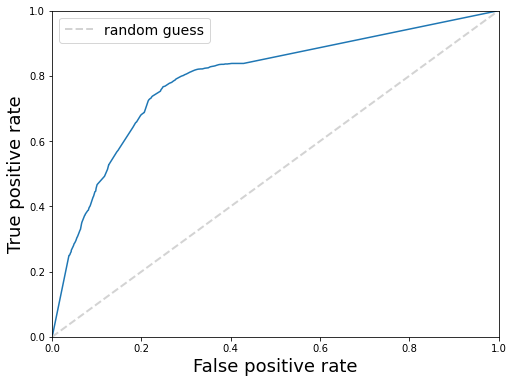

DT on one hot encoded test set: AUC is:  79.16 %


In [73]:
#decision tree without hyper parameter tuning
from sklearn.tree import DecisionTreeClassifier

dtc_onehot = DecisionTreeClassifier(random_state=1)
dtc_onehot.fit(x_train,y_train)
# Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, dtc_onehot.predict(x_train)
precision_score_dtc_onehot_train = precision_score(x_actual, x_pred)
accuracy_score_dtc_onehot_train = accuracy_score(x_actual, x_pred)
print('The precision score of decision tree on one hot encoded TRAIN is : ',round(precision_score_dtc_onehot_train * 100,2), '%')
print('The accuracy score of decision tree on one hot encoded TRAIN is : ',round(accuracy_score_dtc_onehot_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, dtc_onehot.predict(x_test)
precision_score_dtc_onehot_test =  precision_score(y_actual, y_pred)
accuracy_score_dtc_onehot_test = accuracy_score(y_actual, y_pred)
print('The precision score of decision tree on one hot encoded TEST is : ',round(precision_score_dtc_onehot_test * 100,2), '%')
print('The accuracy score of decision tree on one hot encoded TEST is : ',round(accuracy_score_dtc_onehot_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = dtc_onehot.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('DT on one hot encoded test set: AUC is: ', round(AUC_DT * 100,2), '%')




The best parameters are:  {'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 10, 'random_state': 14}
best mean cross-validated score (auc) :  0.861220995582733
The precision score of tuned decision tree on one hot encoded TRAIN is :  68.06 %
The accuracy score of tuned decision tree on one hot encoded TRAIN is :  82.04 %
The precision score of tuned decision tree on one hot encoded TEST is :  65.81 %
The accuracy score of tuned decision tree on one hot encoded TEST is :  81.46 %


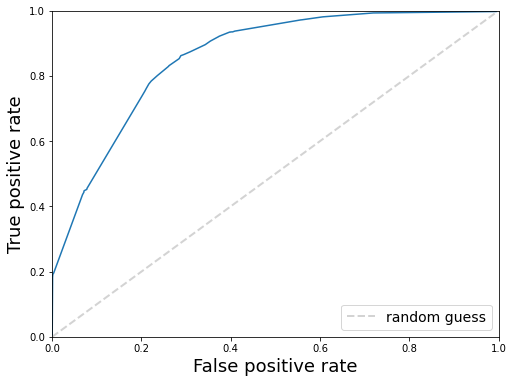

TNDT AUC on onehot encoded data is:  85.84 %


In [74]:
#decision tree with hyper parameter tuning.
# Decision tree classifier with grid seacrh CV and model evaluation using accuracy score, precision score and AUC/ROC curve.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7],'min_samples_leaf':[1,10,100],'random_state':[14]} 

clf_onehot = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='roc_auc')
clf_onehot.fit(x_train, y_train)

print('The best parameters are: ', clf_onehot.best_params_)
print('best mean cross-validated score (auc) : ', clf_onehot.best_score_)

# Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf_onehot.predict(x_train)
precision_score_TNDT_onehot_train = precision_score(x_actual, x_pred)
accuracy_score_TNDT_onehot_train = accuracy_score(x_actual, x_pred)
print('The precision score of tuned decision tree on one hot encoded TRAIN is : ',round(precision_score_TNDT_onehot_train * 100,2), '%')
print('The accuracy score of tuned decision tree on one hot encoded TRAIN is : ',round(accuracy_score_TNDT_onehot_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf_onehot.predict(x_test)
precision_score_TNDT_onehot_test =  precision_score(y_actual, y_pred)
accuracy_score_TNDT_onehot_test = accuracy_score(y_actual, y_pred)
print('The precision score of tuned decision tree on one hot encoded TEST is : ',round(precision_score_TNDT_onehot_test * 100,2), '%')
print('The accuracy score of tuned decision tree on one hot encoded TEST is : ',round(accuracy_score_TNDT_onehot_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf_onehot.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_DT = auc(fpr,tpr)
print('TNDT AUC on onehot encoded data is: ', round(AUC_DT * 100,2), '%')


# Random forest on one hot encoded data 

The best parameters are:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 14}
best mean cross-validated score (auc) :  0.867827686507708
The precision score of random forest on one hot encoded TRAIN is :  70.34 %
The accuracy score of random forest on one hot encoded TRAIN is :  82.41 %
The precision score of random forest on one hot encoded TEST is :  67.32 %
The accuracy score of random forest on one hot encoded TEST is :  81.66 %


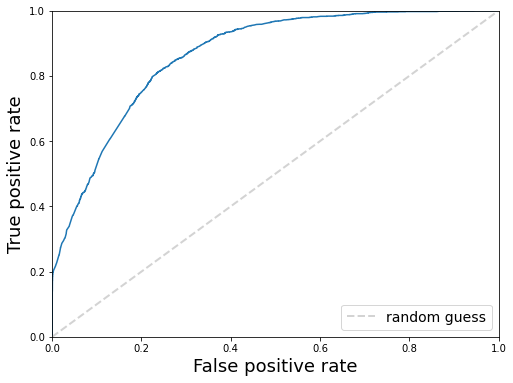

RF AUC on one hot encoded test is:  86.53 %


In [75]:
#random forest
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]} 

clf1_onehot = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='roc_auc')
clf1_onehot.fit(x_train, y_train)

print('The best parameters are: ', clf1_onehot.best_params_)
print('best mean cross-validated score (auc) : ', clf1_onehot.best_score_)

#Predictions and Evaluation metrics on train set.

from sklearn.metrics import precision_score, accuracy_score
x_actual, x_pred = y_train, clf1_onehot.predict(x_train)
precision_score_RF_onehot_train = precision_score(x_actual, x_pred)
accuracy_score_RF_onehot_train = accuracy_score(x_actual, x_pred)
print('The precision score of random forest on one hot encoded TRAIN is : ',round(precision_score_RF_onehot_train * 100,2), '%')
print('The accuracy score of random forest on one hot encoded TRAIN is : ',round(accuracy_score_RF_onehot_train * 100,2), '%')

# Predictions and Evaluation metrics on test set.

from sklearn.metrics import precision_score, accuracy_score
y_actual, y_pred = y_test, clf1_onehot.predict(x_test)
precision_score_RF_onehot_test =  precision_score(y_actual, y_pred)
accuracy_score_RF_onehot_test = accuracy_score(y_actual, y_pred)
print('The precision score of random forest on one hot encoded TEST is : ',round(precision_score_RF_onehot_test * 100,2), '%')
print('The accuracy score of random forest on one hot encoded TEST is : ',round(accuracy_score_RF_onehot_test * 100,2), '%')

#Now let's plot the ROC curve and calculate AUC on the test set

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
adsu = clf1_onehot.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC on one hot encoded test is: ', round(AUC_RF * 100,2), '%')


# Reporting the accuracy/precision/AUC of all the data models used for prediction.

In [79]:
print('The ACCURACY SCORE of various models on train and test are:')
print('                                                         ')
print('The accuracy score of simple decision tree on label encoded data : \t\t\tTRAIN:',round(accuracy_score_DT_train * 100,2), '\b%','\tTEST:',round(accuracy_score_DT_test * 100,2), '\b%')
print('The accuracy score of tuned decision tree on label encoded data : \t\t\tTRAIN:',round(accuracy_score_TNDT_train * 100,2), '\b%','\tTEST:',round(accuracy_score_TNDT_test * 100,2), '\b%')
print('The accuracy score of random forest ensembler on label encoded data: \t\t\tTRAIN:',round(accuracy_score_RF_train * 100,2), '\b%','\tTEST:',round(accuracy_score_RF_test * 100,2), '\b%')
print('The accuracy score of simple decision tree on one hot encoded data : \t\t\tTRAIN:',round(accuracy_score_dtc_onehot_train * 100,2), '\b%','\tTEST:',round(accuracy_score_dtc_onehot_test * 100,2), '\b%')
print('The accuracy score of tuned decision tree on one hot encoded data : \t\t\tTRAIN:',round(accuracy_score_TNDT_onehot_train * 100,2), '\b%','\tTEST:',round(accuracy_score_TNDT_onehot_test * 100,2), '\b%')
print('The accuracy score of random forest ensembler on one hot encoded data: \t\t\tTRAIN:',round(accuracy_score_RF_onehot_train * 100,2), '\b%','\tTEST:',round(accuracy_score_RF_onehot_test * 100,2), '\b%')


The ACCURACY SCORE of various models on train and test are:
                                                         
The accuracy score of simple decision tree on label encoded data : 			TRAIN: 86.46 % 	TEST: 79.42 %
The accuracy score of tuned decision tree on label encoded data : 			TRAIN: 81.74 % 	TEST: 81.33 %
The accuracy score of random forest ensembler on label encoded data: 			TRAIN: 82.26 % 	TEST: 81.63 %
The accuracy score of simple decision tree on one hot encoded data : 			TRAIN: 86.46 % 	TEST: 79.74 %
The accuracy score of tuned decision tree on one hot encoded data : 			TRAIN: 82.04 % 	TEST: 81.46 %
The accuracy score of random forest ensembler on one hot encoded data: 			TRAIN: 82.41 % 	TEST: 81.66 %


In [81]:
print('The PRECISION SCORE of various models on train and test are:')
print('                                                         ')
print('The precision score of simple decision tree on label encoded data : \t\t\tTRAIN:',round(precision_score_DT_train * 100,2), '\b%','\tTEST:',round(precision_score_DT_test * 100,2), '\b%')
print('The precision score of tuned decision tree on label encoded data : \t\t\tTRAIN:',round(precision_score_TNDT_train * 100,2), '\b%','\tTEST:',round(precision_score_TNDT_test * 100,2), '\b%')
print('The precision score of random forest ensembler on label encoded data: \t\t\tTRAIN:',round(precision_score_RF_train * 100,2), '\b%','\tTEST:',round(precision_score_RF_test * 100,2), '\b%')
print('The precision score of simple decision tree on one hot encoded data : \t\t\tTRAIN:',round(precision_score_dtc_onehot_train * 100,2), '\b%','\tTEST:',round(precision_score_dtc_onehot_test * 100,2), '\b%')
print('The precision score of tuned decision tree on one hot encoded data : \t\t\tTRAIN:',round(precision_score_TNDT_onehot_train * 100,2), '\b%','\tTEST:',round(precision_score_TNDT_onehot_test * 100,2), '\b%')
print('The precision score of random forest ensembler on one hot encoded data: \t\tTRAIN:',round(precision_score_RF_onehot_train * 100,2), '\b%','\tTEST:',round(precision_score_RF_onehot_test * 100,2), '\b%')


The PRECISION SCORE of various models on train and test are:
                                                         
The precision score of simple decision tree on label encoded data : 			TRAIN: 78.26 % 	TEST: 57.92 %
The precision score of tuned decision tree on label encoded data : 			TRAIN: 66.54 % 	TEST: 64.6 %
The precision score of random forest ensembler on label encoded data: 			TRAIN: 70.1 % 	TEST: 67.44 %
The precision score of simple decision tree on one hot encoded data : 			TRAIN: 78.26 % 	TEST: 58.84 %
The precision score of tuned decision tree on one hot encoded data : 			TRAIN: 68.06 % 	TEST: 65.81 %
The precision score of random forest ensembler on one hot encoded data: 		TRAIN: 70.34 % 	TEST: 67.32 %


In [ ]:
AUC score:
    
DT AUC on label encoded test is:  78.17 %
TNDT AUC on label encoded test is:  85.57 %
RF AUC on label encoded test is:  86.36 %
DT on one hot encoded test set: AUC is:  79.16 %
TNDT AUC on onehot encoded data is:  85.84 %
RF AUC on one hot encoded test is:  86.53 %


# Conclusion: One hot encoding gave better accuracy , Precision and AUC score for our problem statement for decision trees and random forests.